# Assignment 2: Regression for Housing Price Predictions
## 1. Import libraries & dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Add atttribute names while importing the dataset.

In [2]:
filename = ("housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filename, delim_whitespace=True, names=names)

Attribute information:
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

## 2. Exploratory data analysis & preprocessing data

Check the dataset, its size and data types.

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Check if there are null values in the dataset, and remove them.

In [6]:
df.isnull().sum()
df.dropna(inplace=True)
df.reset_index(drop=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Split the data into features and targets. Then, split it into training and testing sets.

In [7]:
Y = df["MEDV"]
X = df.drop("MEDV", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Standardize the features.

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Build & train regression models
Linear regression, Ridge regression and Lasso regression models are used in this assignment.

#### Linear Regression

In [9]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, Y_train)

# Predictions
Y_pred_linear = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mse_linear = mean_squared_error(Y_test, Y_pred_linear)
mae_linear = mean_absolute_error(Y_test,Y_pred_linear)
print(f'Linear Regression - Mean Squared Error: {mse_linear}, Mean Absolute Error: {mae_linear}')


Linear Regression - Mean Squared Error: 24.291119474973517, Mean Absolute Error: 3.1890919658878483


#### Ridge Regression

In [10]:
ridge_reg_model = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(ridge_reg_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, Y_train)

# Best hyperparameter
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Predictions
Y_pred_ridge = grid_search_ridge.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
mae_ridge = mean_absolute_error(Y_test,Y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge} with alpha={best_alpha_ridge}, Mean Absolute Error: {mae_ridge} with alpha={best_alpha_ridge}')

Ridge Regression - Mean Squared Error: 24.31290383049162 with alpha=1, Mean Absolute Error: 3.1857238072445964 with alpha=1


#### Lasso Regression

In [11]:
# Create and train the Lasso Regression model with hyperparameter tuning
lasso_reg_model = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso_reg_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, Y_train)

# Best hyperparameter
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

# Predictions
Y_pred_lasso = grid_search_lasso.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
mae_lasso = mean_absolute_error(Y_test, Y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso} with alpha={best_alpha_lasso}, Mean Absolute Error: {mae_lasso} with alpha={best_alpha_lasso}')


Lasso Regression - Mean Squared Error: 25.656739367167678 with alpha=0.1, Mean Absolute Error: 3.2418034658794648 with alpha=0.1


## 4. Prediction & results

Evaluation from all three models:

In [12]:
print(f'Linear Regression - Mean Squared Error: {mse_linear}, Mean Absolute Error: {mae_linear}')
print(f'Ridge Regression - Mean Squared Error: {mse_ridge} with alpha={best_alpha_ridge}, Mean Absolute Error: {mae_ridge} with alpha={best_alpha_ridge}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso} with alpha={best_alpha_lasso}, Mean Absolute Error: {mae_lasso} with alpha={best_alpha_lasso}')

Linear Regression - Mean Squared Error: 24.291119474973517, Mean Absolute Error: 3.1890919658878483
Ridge Regression - Mean Squared Error: 24.31290383049162 with alpha=1, Mean Absolute Error: 3.1857238072445964 with alpha=1
Lasso Regression - Mean Squared Error: 25.656739367167678 with alpha=0.1, Mean Absolute Error: 3.2418034658794648 with alpha=0.1


Compare the three regression models.

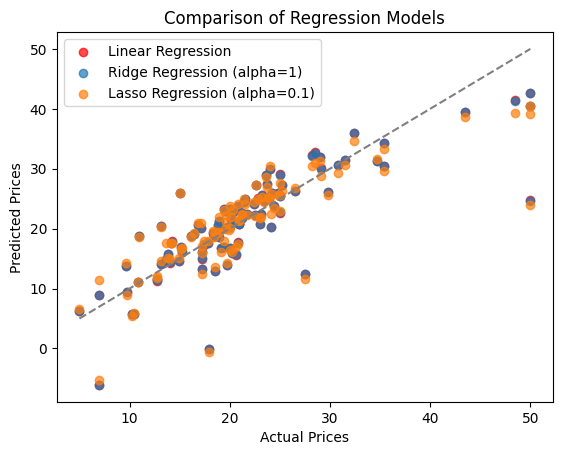

In [13]:
# Scatter plot for Linear Regression
plt.scatter(Y_test, Y_pred_linear, label='Linear Regression', alpha=0.7, c='red')

# Scatter plot for Ridge Regression
plt.scatter(Y_test, Y_pred_ridge, label=f'Ridge Regression (alpha={best_alpha_ridge})', alpha=0.7)

# Scatter plot for Lasso Regression
plt.scatter(Y_test, Y_pred_lasso, label=f'Lasso Regression (alpha={best_alpha_lasso})', alpha=0.7)

# Diagonal line for perfect predictions
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')


plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()
